In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

MSE: 30730768750.98604
R2: 0.542958722097989
Coefficients: [    99.10705026 -11060.54821855  29456.12132012  14082.58794392]
Intercept: -1967701.162155006


In [4]:
# 2. Load and clean the data
file_path = 'Indian_housing_Delhi_data.csv'
df = pd.read_csv(file_path)

def extract_sqft(val):
    match = re.search(r'(\d+[,.]?\d*)', str(val))
    return float(match.group().replace(',', '')) if match else None

df['house_size_num'] = df['house_size'].apply(extract_sqft)
df['numBathrooms'] = pd.to_numeric(df['numBathrooms'], errors='coerce').fillna(1)

df = df.dropna(subset=['price', 'house_size_num', 'latitude', 'longitude'])
df = df.reset_index(drop=True)
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,house_size_num
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished,400.0
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished,400.0
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished,500.0
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished,1020.0
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished,810.0


In [6]:
# 3. Feature engineering: select features and target
y = df['price']
X = df[['house_size_num', 'numBathrooms', 'latitude', 'longitude']].fillna(0)

In [7]:
# 4. Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 4000, Testing samples: 1000


In [9]:
# 5. Fit and evaluate different linear regression models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
for name, reg in models.items():
    reg.fit(X_train, y_train)
    preds = reg.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {'MSE': mse, 'R2': r2, 'Coefficients': reg.coef_, 'Intercept': reg.intercept_}

results_df = pd.DataFrame(results).T[['MSE', 'R2']]
print('Comparison of Linear Regression Types:')
print(results_df)

# Optionally, show coefficients for each model
for name, vals in results.items():
    print(f'\n{name} coefficients: {vals["Coefficients"]}')

Comparison of Linear Regression Types:
                                 MSE        R2
LinearRegression  30730768750.986038  0.542959
Ridge             30731121169.222584  0.542953
Lasso             30730774967.409992  0.542959
ElasticNet        30765810125.518295  0.542438

LinearRegression coefficients: [    99.10705026 -11060.54821855  29456.12132012  14082.58794392]

Ridge coefficients: [    99.10263358 -11050.6935069   29324.62226262  13974.46514738]

Lasso coefficients: [    99.10695178 -11060.19190545  29455.95868778  14076.06992852]

ElasticNet coefficients: [   98.41104016 -9561.8068223  14941.50454166  6380.51146139]


# 7. Summary

- Data was split 80% for training and 20% for testing.
- Multiple linear regression models (Linear, Ridge, Lasso, ElasticNet) were compared.
- Results and coefficients are printed above.
- Visualization shows actual vs predicted prices for the standard linear regression model.

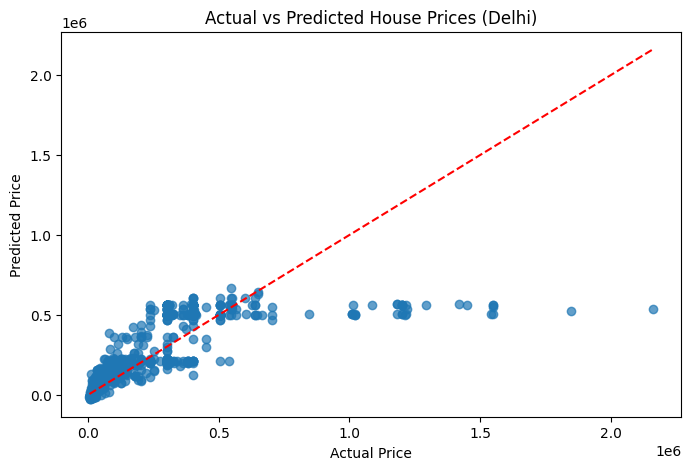

In [2]:
# Visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, preds, alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Delhi)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [3]:
# Compare different types of linear regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
for name, reg in models.items():
    reg.fit(X_train, y_train)
    preds = reg.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {'MSE': mse, 'R2': r2, 'Coefficients': reg.coef_, 'Intercept': reg.intercept_}

results_df = pd.DataFrame(results).T[['MSE', 'R2']]
print('Comparison of Linear Regression Types:')
print(results_df)

# Optionally, show coefficients for each model
for name, vals in results.items():
    print(f'\n{name} coefficients: {vals["Coefficients"]}')

Comparison of Linear Regression Types:
                                 MSE        R2
LinearRegression  30730768750.986038  0.542959
Ridge             30731121169.222584  0.542953
Lasso             30730774967.409992  0.542959
ElasticNet        30765810125.518295  0.542438

LinearRegression coefficients: [    99.10705026 -11060.54821855  29456.12132012  14082.58794392]

Ridge coefficients: [    99.10263358 -11050.6935069   29324.62226262  13974.46514738]

Lasso coefficients: [    99.10695178 -11060.19190545  29455.95868778  14076.06992852]

ElasticNet coefficients: [   98.41104016 -9561.8068223  14941.50454166  6380.51146139]


In [13]:
# Display the loaded DataFrame for Delhi housing
print(df.head())
# If you want to assign to a variable:
indian_housing_delhi_data_df = df
indian_housing_delhi_data_df.head()

                 house_type   house_size           location   city   latitude  \
0    1 RK Studio Apartment     400 sq ft            Kalkaji  Delhi  28.545561   
1    1 RK Studio Apartment     400 sq ft  Mansarover Garden  Delhi  28.643259   
2  2 BHK Independent Floor     500 sq ft        Uttam Nagar  Delhi  28.618677   
3  3 BHK Independent House   1,020 sq ft         Model Town  Delhi  28.712898   
4          2 BHK Apartment     810 sq ft   Sector 13 Rohini  Delhi  28.723539   

   longitude  price currency  numBathrooms  numBalconies isNegotiable  \
0  77.254349  22000      INR           1.0           NaN          NaN   
1  77.132828  20000      INR           1.0           NaN          NaN   
2  77.053352   8500      INR           1.0           NaN          NaN   
3  77.180000  48000      INR           3.0           NaN          NaN   
4  77.131424  20000      INR           2.0           NaN          NaN   

   priceSqFt    verificationDate  \
0        NaN    Posted a day ago   
1 

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,house_size_num
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished,400.0
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished,400.0
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished,500.0
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished,1020.0
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished,810.0


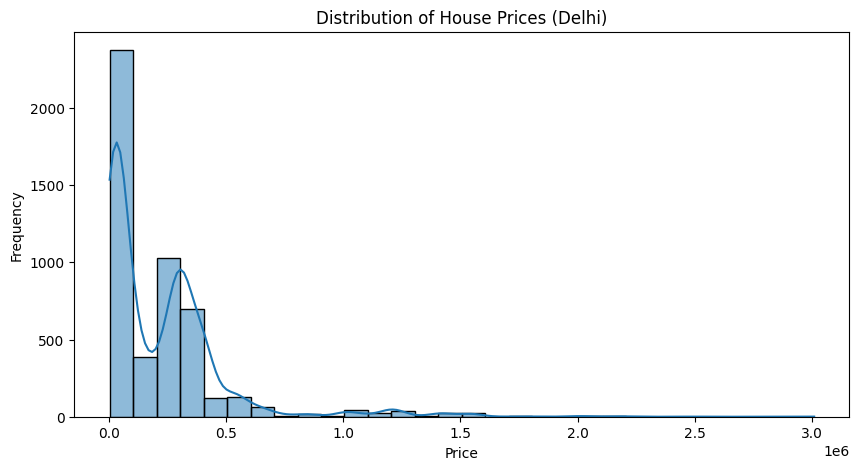

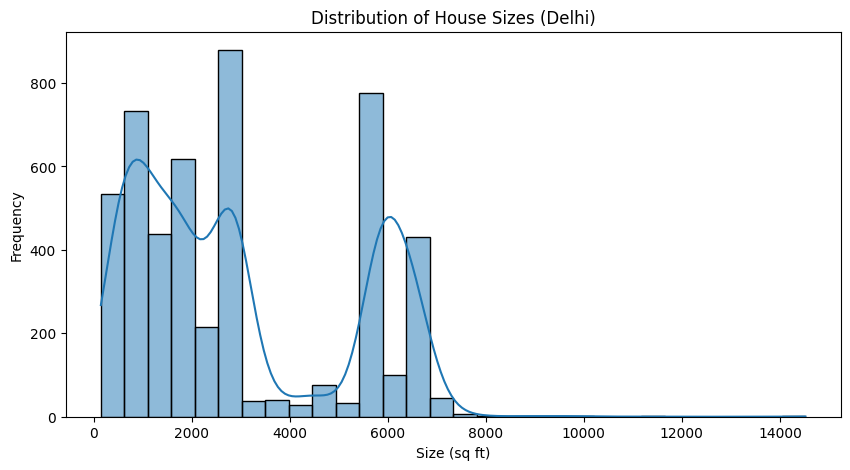

In [14]:
# Analyze distribution of house prices and sizes
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(indian_housing_delhi_data_df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices (Delhi)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(indian_housing_delhi_data_df['house_size_num'], bins=30, kde=True)
plt.title('Distribution of House Sizes (Delhi)')
plt.xlabel('Size (sq ft)')
plt.ylabel('Frequency')
plt.show()

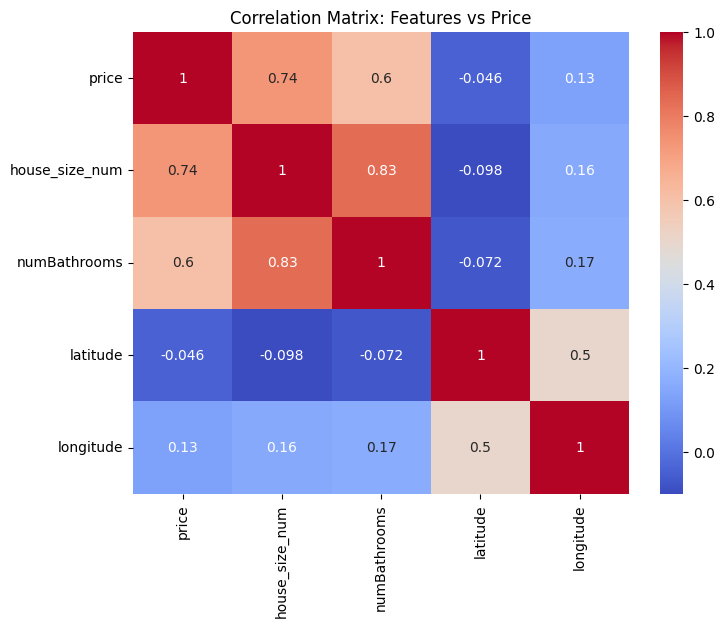

In [15]:
# Correlation analysis between features and price
corr = indian_housing_delhi_data_df[['price','house_size_num','numBathrooms','latitude','longitude']].corr()
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Features vs Price')
plt.show()

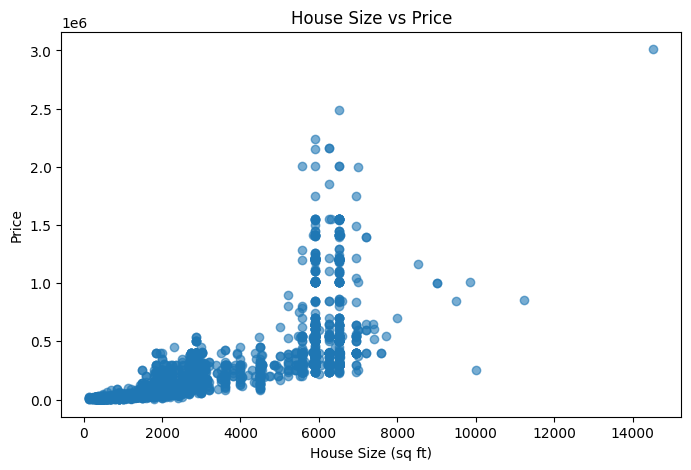

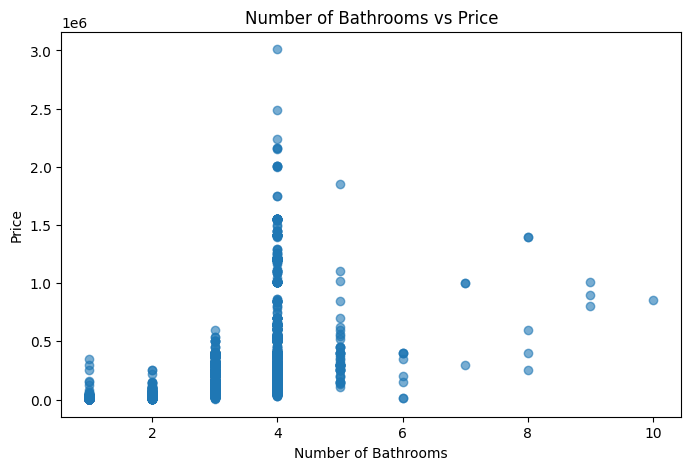

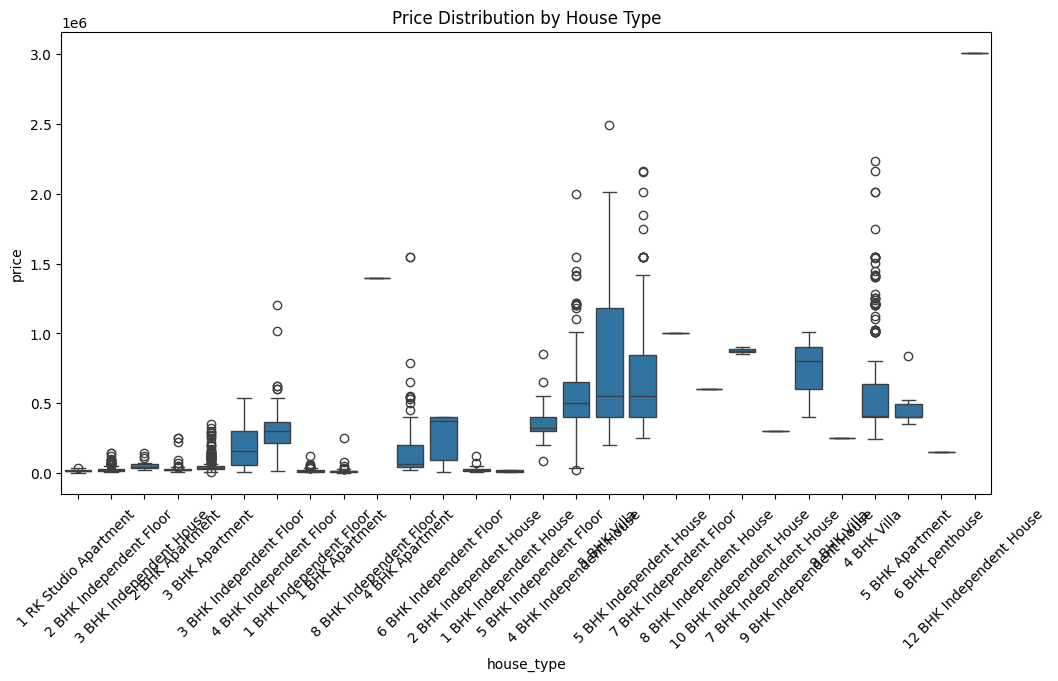

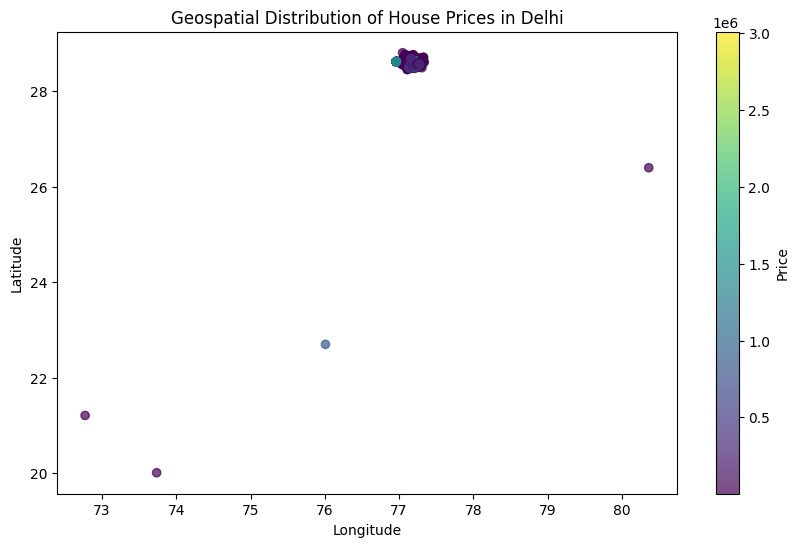

In [16]:
# Scatter plot: House size vs Price
plt.figure(figsize=(8,5))
plt.scatter(indian_housing_delhi_data_df['house_size_num'], indian_housing_delhi_data_df['price'], alpha=0.6)
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.title('House Size vs Price')
plt.show()

# Scatter plot: Number of Bathrooms vs Price
plt.figure(figsize=(8,5))
plt.scatter(indian_housing_delhi_data_df['numBathrooms'], indian_housing_delhi_data_df['price'], alpha=0.6)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs Price')
plt.show()

# Boxplot: Price by House Type
plt.figure(figsize=(12,6))
sns.boxplot(x=indian_housing_delhi_data_df['house_type'], y=indian_housing_delhi_data_df['price'])
plt.xticks(rotation=45)
plt.title('Price Distribution by House Type')
plt.show()

# Geospatial plot: Price vs Location (Latitude & Longitude)
plt.figure(figsize=(10,6))
plt.scatter(indian_housing_delhi_data_df['longitude'], indian_housing_delhi_data_df['latitude'], c=indian_housing_delhi_data_df['price'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of House Prices in Delhi')
plt.show()

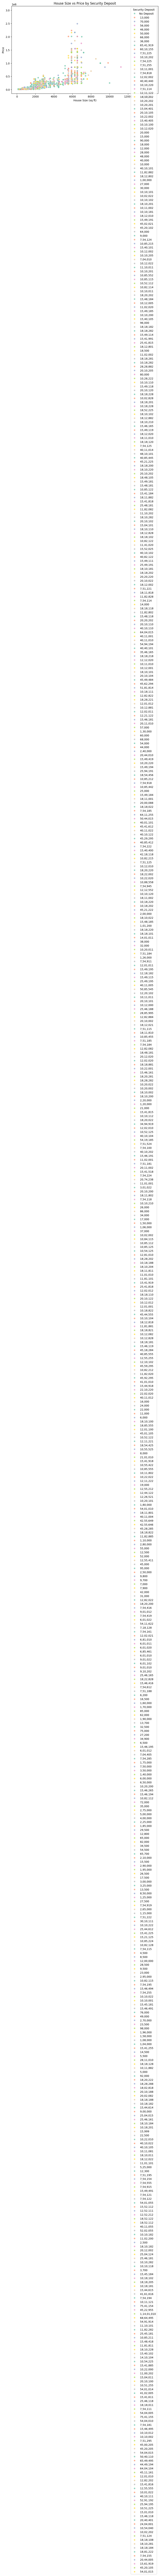

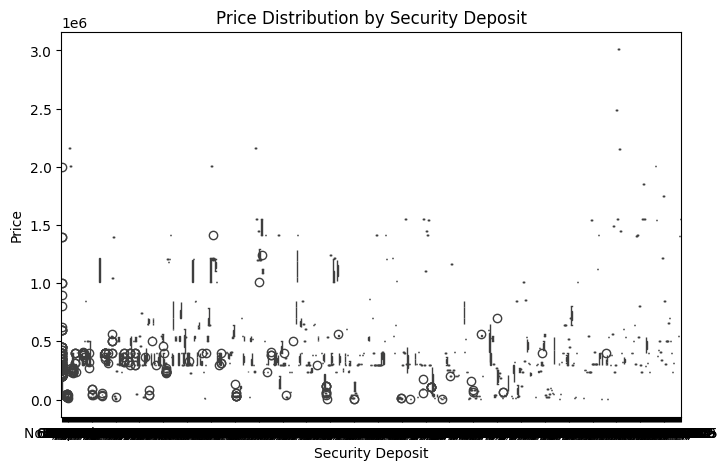

In [17]:
# Analysis: House Size, Price, Security Deposit
plt.figure(figsize=(10,6))
sns.scatterplot(data=indian_housing_delhi_data_df, x='house_size_num', y='price', hue='SecurityDeposit', palette='Set2', alpha=0.7)
plt.title('House Size vs Price by Security Deposit')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.legend(title='Security Deposit')
plt.show()

# Boxplot: Price by Security Deposit
plt.figure(figsize=(8,5))
sns.boxplot(x='SecurityDeposit', y='price', data=indian_housing_delhi_data_df)
plt.title('Price Distribution by Security Deposit')
plt.xlabel('Security Deposit')
plt.ylabel('Price')
plt.show()

In [ ]:
# Short summary: Average price by security deposit
avg_price_by_deposit = indian_housing_delhi_data_df.groupby('SecurityDeposit')['price'].mean()
print(avg_price_by_deposit)

In [ ]:
# Predict price based on house size using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_size = indian_housing_delhi_data_df[['house_size_num']].fillna(0)
y_price = indian_housing_delhi_data_df['price']
model.fit(X_size, y_price)
predicted_prices = model.predict(X_size)

# Add predictions to DataFrame
indian_housing_delhi_data_df['predicted_price'] = predicted_prices

# Heatmap: Actual vs Predicted Price by House Size
import numpy as np
import seaborn as sns
# Bin house sizes for heatmap
indian_housing_delhi_data_df['size_bin'] = pd.cut(indian_housing_delhi_data_df['house_size_num'], bins=20)
heatmap_data = indian_housing_delhi_data_df.groupby('size_bin')[['price','predicted_price']].mean()
heatmap_data = heatmap_data.reset_index()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data[['price','predicted_price']].T, annot=True, cmap='YlGnBu', cbar=True)
plt.yticks([0.5,1.5], ['Actual Price','Predicted Price'], rotation=0)
plt.title('Heatmap: Actual vs Predicted Price by House Size Bin')
plt.show()